# 서울지역 스타벅스 매장정보 크롤링 

#### 미션1 : 메인화면 페이지 화면캡쳐 및 저장
#### 미션2 : 서울지역 스타벅스 매장정보 크롤링
#### 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율 = alpha x 100 / 스타벅스매장수/인구수)
#### 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화
#### 과제5 : 스벅비율이 반영된 파일을 저장

### 미션1 

In [1]:
#Selenium 설치
!pip install selenium

In [2]:
# Beaustifulsoup, Selenium, Pandas 라이브러리 불러오기
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
import pandas as pd

import re


In [5]:
# 웹드라이브로 크롬브라우즈 띄움
driver_path = "C:/Users/ktm/Anaconda_src/driver/chromedriver_win32/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [6]:
#스타벅스 페이지로 연결
url_page = 'https://www.istarbucks.co.kr/'
driver.get(url_page)

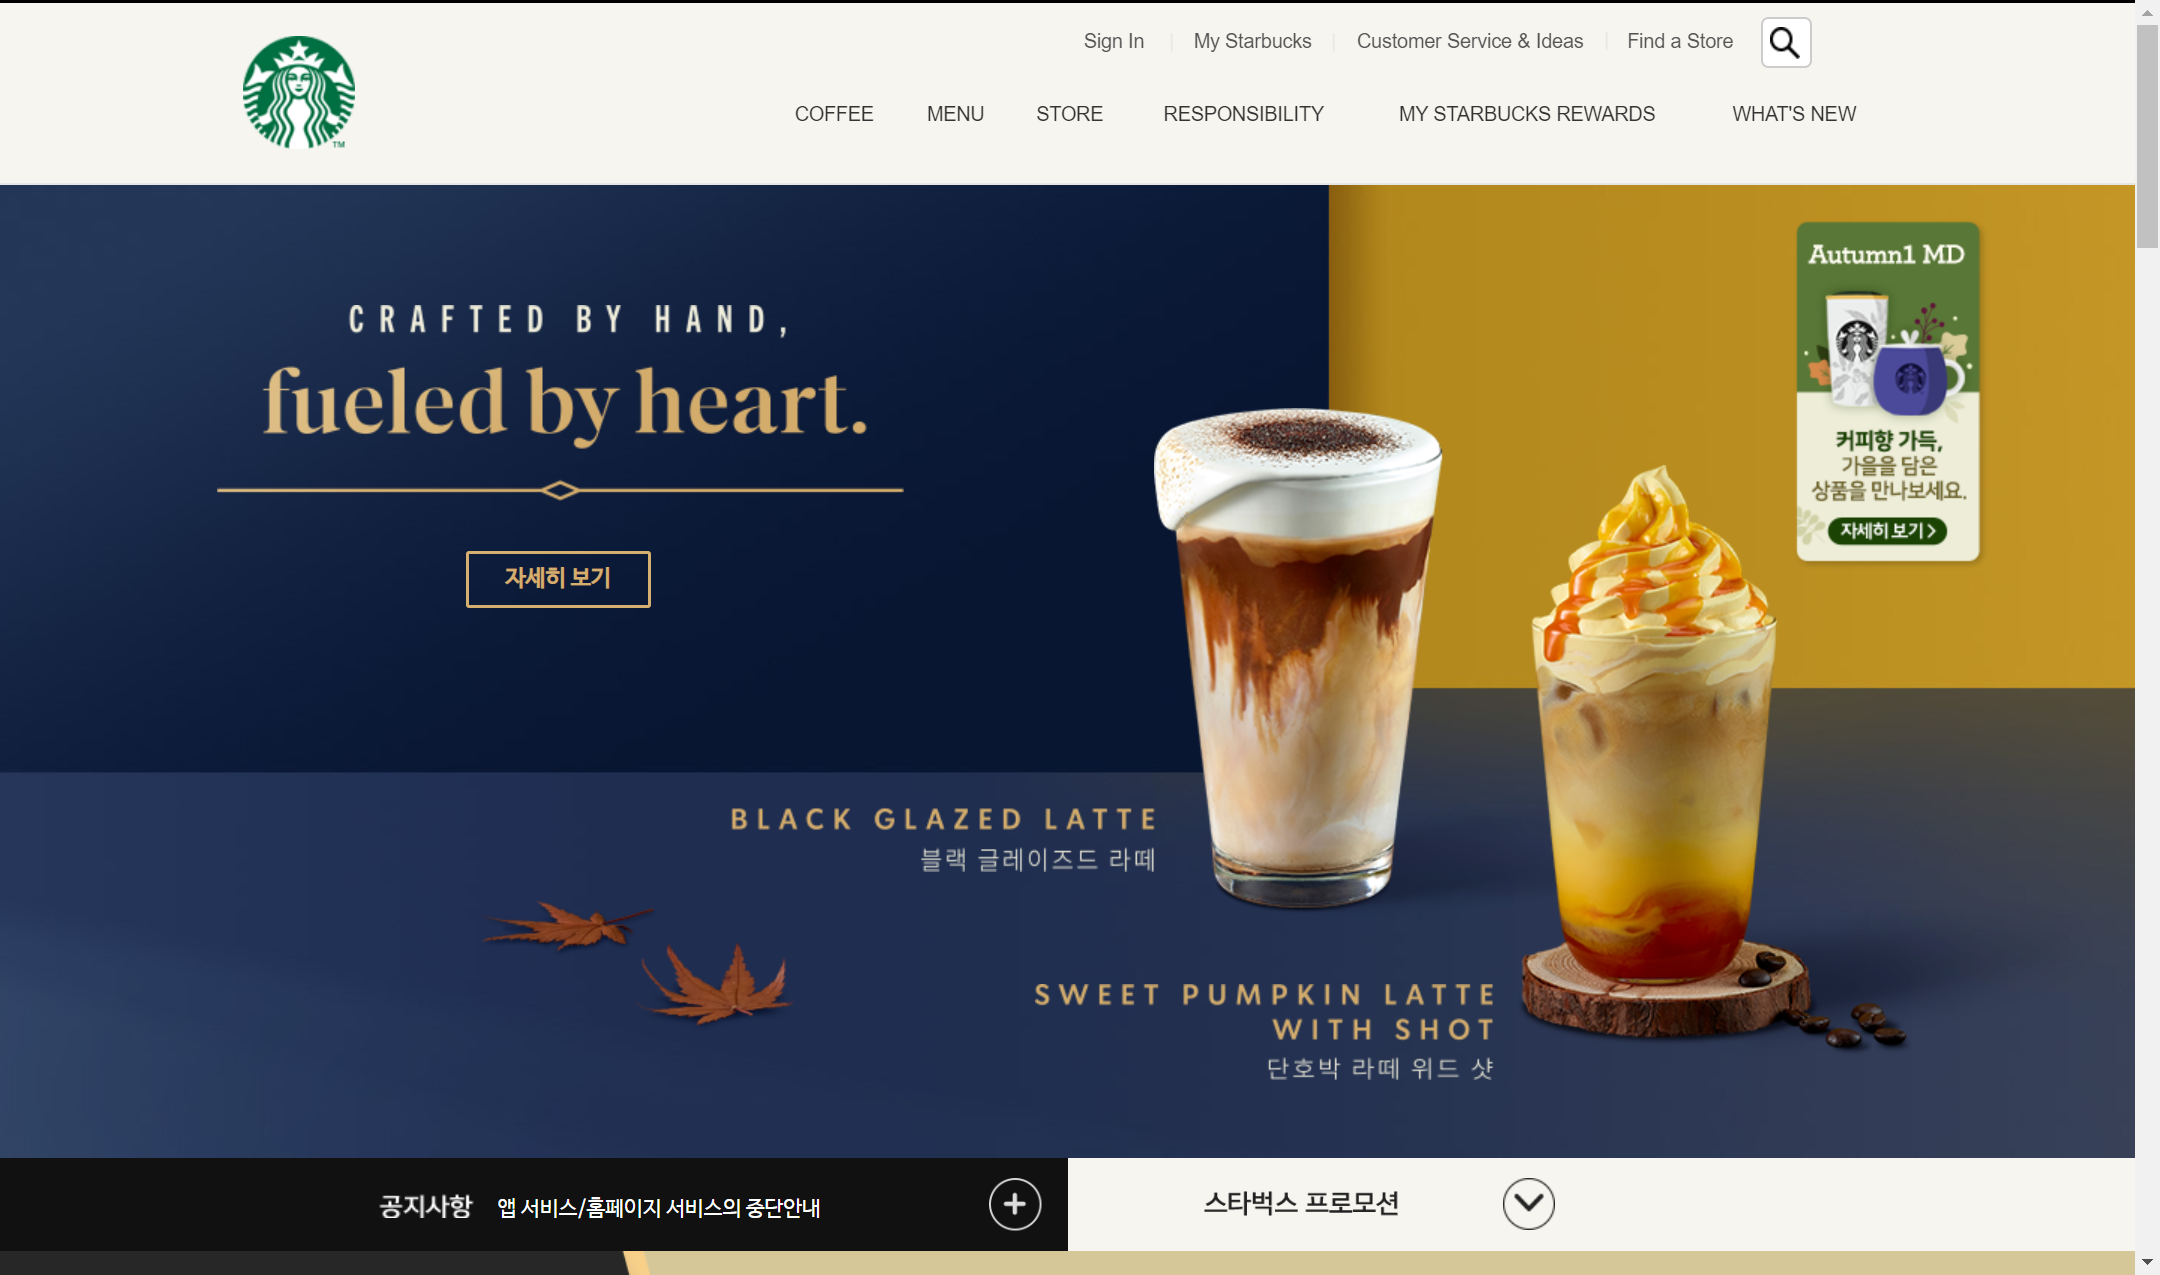

In [38]:
#스타벅스 스크린샷 저장
capture_img = 'C:/Users/yjp13/Anaconda Src/images/starbucks_webpage.png'
driver.save_screenshot(capture_img)
Image(capture_img)

### 미션2

In [7]:
# 매장찾기 클릭
driver.find_element_by_css_selector('#gnb > div > div > nav > ul > li.util_nav04 > a').click()

In [8]:
#지역검색 클릭
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()

In [9]:
#서울시 클릭
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [10]:
#서울전체 찾기 클릭
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

In [11]:
#Beautiful soup 함수를 soup으로 변수 지정
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [12]:
#사이트 제목갖고 오기
soup.title.get_text()

'Starbucks Coffee Korea'

In [13]:
#현재 웹사이트
current_url = driver.current_url
current_url

'https://www.istarbucks.co.kr/store/store_map.do'

In [14]:
#매장이름, 주소, 전화번호 포함 HTML소스 불러오기
li_tags=soup.find_all('li','quickResultLstCon')
len(li_tags)

509

In [15]:
#첫번째 소스 보기 편하게 정리
li_tag=li_tags[0]
print(li_tag.prettify())

<li class="quickResultLstCon" data-code="9602" data-hlytag="null" data-index="0" data-lat="37.550266" data-long="126.923179" data-name="홍대삼거리" data-storecd="397" style="background:#fff">
 <strong>
  홍대삼거리
  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="홍대삼거리" data-store="397" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/>
 </strong>
 <p class="result_details">
  서울특별시 마포구 와우산로 64 (상수동)
  <br/>
  02-758-8402
 </p>
 <i class="pin_general">
  리저브 매장 2번
 </i>
</li>



In [16]:
#매장이름 갖고오기
name=li_tag.find('strong')
name=name.get_text()
name

'홍대삼거리  '

In [17]:
#매장주소 및 전화번호 갖고오기
tag_info=li_tag.find('p','result_details')
tag_info=tag_info.get_text()
tag_info

'서울특별시 마포구 와우산로 64 (상수동)02-758-8402'

In [18]:
#매장 전화번호 선별
telephone=re.search('\d{2}[-]\d{3,4}[-]\d{4}', tag_info).group()
telephone
len(telephone)

11

In [19]:
#매장 주소 선별
address = tag_info[:-len(telephone)]
address

'서울특별시 마포구 와우산로 64 (상수동)'

In [20]:
#구 선별
pattern=re.compile("\w구|\w\w구|\w\w\w구")
areas = pattern.findall(address)
area=areas[0]
area


'마포구'

In [22]:
#미션2
starbucks_dict=dict()
columns=['매장이름','구','주소','전화번호']

#리스트 생성
name_list = list()
address_list = list()
telephone_list = list()
area_list=list()

#매장갯수만큼 반복
for i in range(len(li_tags)):
    li_tag=li_tags[i]
    
    # 이름
    name=li_tag.find('strong')
    name=name.get_text()

    
    #주소 & 전화번호
    tag_info=li_tag.find('p','result_details')
    tag_info=tag_info.get_text()
 
    
    # 전화번호
    telephone=re.search('\d{2}[-]\d{3,4}[-]\d{4}', tag_info).group()
    len(telephone)
    
    #주소
    address = tag_info[:-len(telephone)]
    
    #구 선별
    pattern=re.compile("\w구|\w\w구|\w\w\w구")
    areas = pattern.findall(address)
    area=areas[0]
    

    #리스트에 담기
    name_list.append(name)
    address_list.append(address)
    telephone_list.append(telephone)
    area_list.append(area)
    
    #딕셔너리에 담기
    starbucks_dict[columns[0]] = name_list
    starbucks_dict[columns[1]]= area_list
    starbucks_dict[columns[2]] = address_list
    starbucks_dict[columns[3]] = telephone_list
  
    
    #딕셔너리 데이터 프레임으로 생성
    starbucks=pd.DataFrame(starbucks_dict)
    
    #컬럼 정렬
    new_columns = [ '구','매장이름', '주소', '전화번호']
    starbucks=starbucks.loc[:,new_columns]
    
#스타벅스 매장정보 CSV파일로 생성
starbucks.to_csv('C:/Users/ktm/Anaconda_src/data/starbucks_store_info.csv', sep=',', encoding='utf-8')


In [23]:
#이름 리스트 확인
name_list[:5]

['홍대삼거리  ', '홍대공원  ', '상수역  ', '홍대갤러리  ', '서교  ']

In [24]:
#지역 리스트 확인
area_list[0:10]

['마포구', '마포구', '마포구', '마포구', '마포구', '마포구', '마포구', '마포구', '마포구', '마포구']

In [25]:
#주소 리스트 확인
address_list[:5]

['서울특별시 마포구 와우산로 64 (상수동)',
 '서울특별시 마포구 와우산로 83 (서교동)',
 '서울특별시 마포구 독막로 88 (상수동)',
 '서울특별시 마포구 와우산로 101, 정명빌딩 (서교동)',
 '서울특별시 마포구 양화로 78 (서교동) 서교빌딩 1층']

In [26]:
#전화번호 리스트 확인
telephone_list[:5]

['02-758-8402', '02-758-8786', '02-758-8925', '02-758-8293', '02-758-8856']

In [27]:
starbucks.head(10)

,구,매장이름,주소,전화번호
0,마포구,홍대삼거리,서울특별시 마포구 와우산로 64 (상수동),02-758-8402
1,마포구,홍대공원,서울특별시 마포구 와우산로 83 (서교동),02-758-8786
2,마포구,상수역,서울특별시 마포구 독막로 88 (상수동),02-758-8925
3,마포구,홍대갤러리,"서울특별시 마포구 와우산로 101, 정명빌딩 (서교동)",02-758-8293
4,마포구,서교,서울특별시 마포구 양화로 78 (서교동) 서교빌딩 1층,02-758-8856
5,마포구,서교동사거리,서울특별시 마포구 양화로 105 (서교동),02-326-5218
6,마포구,홍대입구역사거리R,서울특별시 마포구 양화로 125 (서교동),02-325-3531
7,마포구,합정메세나몰,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스)",02-758-8534
8,마포구,합정폴리스R,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스)",02-324-3587
9,마포구,합정,"서울특별시 마포구 월드컵로1길 14 (합정동) 마포한강푸르지오 110, 111, 1...",02-323-3214


In [28]:
#스타벅스 데이터프레임 '구'로 인덱스 지정
starbucks.set_index('구', inplace=True)           
starbucks.head()

,매장이름,주소,전화번호
구,,,
마포구,홍대삼거리,서울특별시 마포구 와우산로 64 (상수동),02-758-8402
마포구,홍대공원,서울특별시 마포구 와우산로 83 (서교동),02-758-8786
마포구,상수역,서울특별시 마포구 독막로 88 (상수동),02-758-8925
마포구,홍대갤러리,"서울특별시 마포구 와우산로 101, 정명빌딩 (서교동)",02-758-8293
마포구,서교,서울특별시 마포구 양화로 78 (서교동) 서교빌딩 1층,02-758-8856


In [29]:
startbucks_count=starbucks.groupby("구").size()
startbucks_count.count()

25

### 미션3 

In [30]:
#서울 인구 파일 불러오기
population = pd.read_csv('C:/Users/ktm/Anaconda_src/data/pop.csv', sep=',', encoding='euc-kr')
population.head()

,Unnamed: 0,구,세대,인구수,세대당인구,65세이상고령자,고령비율
0,0,합계,4304243,10041574,2.27,1451564,14.455543
1,1,종로구,73828,162413,2.06,27155,16.719721
2,2,중구,62156,136276,2.03,22749,16.693328
3,3,용산구,109692,245069,2.09,38259,15.611522
4,4,성동구,136872,312991,2.23,43370,13.856628


In [31]:
#첫번째줄 삭제
pop=population.drop(0)
pop.head()

,Unnamed: 0,구,세대,인구수,세대당인구,65세이상고령자,고령비율
1,1,종로구,73828,162413,2.06,27155,16.719721
2,2,중구,62156,136276,2.03,22749,16.693328
3,3,용산구,109692,245069,2.09,38259,15.611522
4,4,성동구,136872,312991,2.23,43370,13.856628
5,5,광진구,163914,369470,2.16,46773,12.659485


In [32]:
#서울 인구 파일 '구'로 인덱스 지정
pop.set_index('구', inplace=True)           
pop.head()

,Unnamed: 0,세대,인구수,세대당인구,65세이상고령자,고령비율
구,,,,,,
종로구,1,73828,162413,2.06,27155,16.719721
중구,2,62156,136276,2.03,22749,16.693328
용산구,3,109692,245069,2.09,38259,15.611522
성동구,4,136872,312991,2.23,43370,13.856628
광진구,5,163914,369470,2.16,46773,12.659485


In [33]:
#Unnamed column 삭제
pop=pop.drop(['Unnamed: 0'],axis=1)
pop.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율
구,,,,,
종로구,73828,162413,2.06,27155,16.719721
중구,62156,136276,2.03,22749,16.693328
용산구,109692,245069,2.09,38259,15.611522
성동구,136872,312991,2.23,43370,13.856628
광진구,163914,369470,2.16,46773,12.659485


In [34]:
pop.count()

세대          25
인구수         25
세대당인구       25
65세이상고령자    25
고령비율        25
dtype: int64

In [35]:
#스타벅스 매장 갯수 컬럼 추가
starbucks_rate=pd.concat([pop, startbucks_count],axis=1)
starbucks_rate.head(5)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,세대,인구수,세대당인구,65세이상고령자,고령비율,0
강남구,230752,547602,2.35,69011,12.602401,76
강동구,177368,428547,2.39,60657,14.154107,13
강북구,143650,319377,2.20,59189,18.532643,5
강서구,261383,602230,2.28,81965,13.610249,14
관악구,266692,519864,1.88,73693,14.175438,10


In [36]:
starbucks_rate.head(5)

,세대,인구수,세대당인구,65세이상고령자,고령비율,0
강남구,230752,547602,2.35,69011,12.602401,76
강동구,177368,428547,2.39,60657,14.154107,13
강북구,143650,319377,2.20,59189,18.532643,5
강서구,261383,602230,2.28,81965,13.610249,14
관악구,266692,519864,1.88,73693,14.175438,10


In [37]:
# 0컬럼을 스타벅스 이름으로 변경
starbucks_rate.rename(columns={0:'스타벅스'},inplace=True)

In [38]:
#컬럼명 확인
starbucks_rate.columns

Index(['세대', '인구수', '세대당인구', '65세이상고령자', '고령비율', '스타벅스'], dtype='object')

In [39]:
#스벅비율 계산
starbucks_rate['스벅비율']=(starbucks_rate['스타벅스']*1000000)/starbucks_rate['인구수']

In [40]:
starbucks_rate.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
강남구,230752,547602,2.35,69011,12.602401,76,138.786929
강동구,177368,428547,2.39,60657,14.154107,13,30.335062
강북구,143650,319377,2.20,59189,18.532643,5,15.655479
강서구,261383,602230,2.28,81965,13.610249,14,23.246932
관악구,266692,519864,1.88,73693,14.175438,10,19.235800


In [41]:
starbucks_rate.sort_values(by='스타벅스', ascending=False).head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
강남구,230752,547602,2.35,69011,12.602401,76,138.786929
중구,62156,136276,2.03,22749,16.693328,50,366.902463
서초구,172907,435631,2.49,55853,12.821172,45,103.298434
마포구,173845,385985,2.15,51613,13.371763,42,108.812519
종로구,73828,162413,2.06,27155,16.719721,38,233.971419


### 미션4

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

%matplotlib inline

C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0,

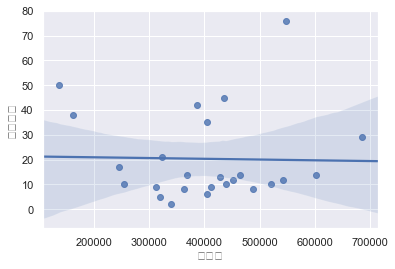

In [43]:
#스타벅스 인구수에 따른 스타벅스 갯수
sns.regplot(x="인구수", y="스타벅스", data=starbucks_rate)

In [49]:
#folium 설치
!pip install folium

In [52]:
#json, folium 라이브러리 설치
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [54]:
#지도파일 불러오기
geo_path = 'C:/Users/ktm/Anaconda_src/data/seoul_data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))


In [55]:
#데이터 프레임 '구'로 설정
starbucks_rate.index.name='구'
starbucks_rate.head(5)

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
구,,,,,,,
강남구,230752,547602,2.35,69011,12.602401,76,138.786929
강동구,177368,428547,2.39,60657,14.154107,13,30.335062
강북구,143650,319377,2.20,59189,18.532643,5,15.655479
강서구,261383,602230,2.28,81965,13.610249,14,23.246932
관악구,266692,519864,1.88,73693,14.175438,10,19.235800


In [56]:
#서울시 지역구와 스타벅스 매장 갯수 데이터 프레임 생성
gustarbucks = pd.DataFrame({'gu':starbucks_rate.index, 'counts':starbucks_rate['스타벅스']})
gustarbucks.head()

,gu,counts
구,,
강남구,강남구,76
강동구,강동구,13
강북구,강북구,5
강서구,강서구,14
관악구,관악구,10


In [57]:
## 스벅매장수를 서울시 지도에 시각화
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=gustarbucks,
              columns=['gu', 'counts'],
              fill_color='PuRd', 
              key_on='feature.id')
map

In [58]:
#서울시 지역구와 스타벅스 매장 비율 생성
gustarbucks_rate = pd.DataFrame({'gu':starbucks_rate.index, 'rate':starbucks_rate['스벅비율']})
gustarbucks_rate.head()

,gu,rate
구,,
강남구,강남구,138.786929
강동구,강동구,30.335062
강북구,강북구,15.655479
강서구,강서구,23.246932
관악구,관악구,19.235800


In [59]:
#스벅비율 서울시 지도에 시각화
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=gustarbucks_rate,
              columns=['gu', 'rate'],
              fill_color='YlGnBu', 
              key_on='feature.id')
map

In [193]:
starbucks_rate.to_csv('C:/Users/yjp13/Anaconda Src/data/seoul_population_sbucks-idx.csv', sep=',', encoding='euc-kr')